<h1><u>Project Report: Drug Interaction Checker</u></h1>

# 1) Introduction
This project aims to verify interactions between different medications using a CSV data file. It also includes functionality to list all the drugs that should not be combined with a specific medication.

## 2) Objectives
- Chemical data analysis with Python.
- Verify interactions between two specific medications.
- List interactions for a specific medication.
- Visualize the top 20 medications with the most interactions and the top 20 with the fewest interactions.


In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement des données
data_path = '../data/drug_interactions.csv'
df = pd.read_csv(data_path, delimiter=';')
print(df.columns)

Index(['drug1', 'drug2'], dtype='object')


## 3) Data Analysis
### a) Distribution of interactions by drug

To effectively represent our data with a graph, we decided to show the number of interactions existing for each medication. However, due to our large database containing over 20,000 medications, the y-axis is somewhat unclear. Nonetheless, it is apparent that each medication has varying interactions ranging from 1 to 246. We have therefore represented the same graph without specifying the drug names on the ordinate axis.

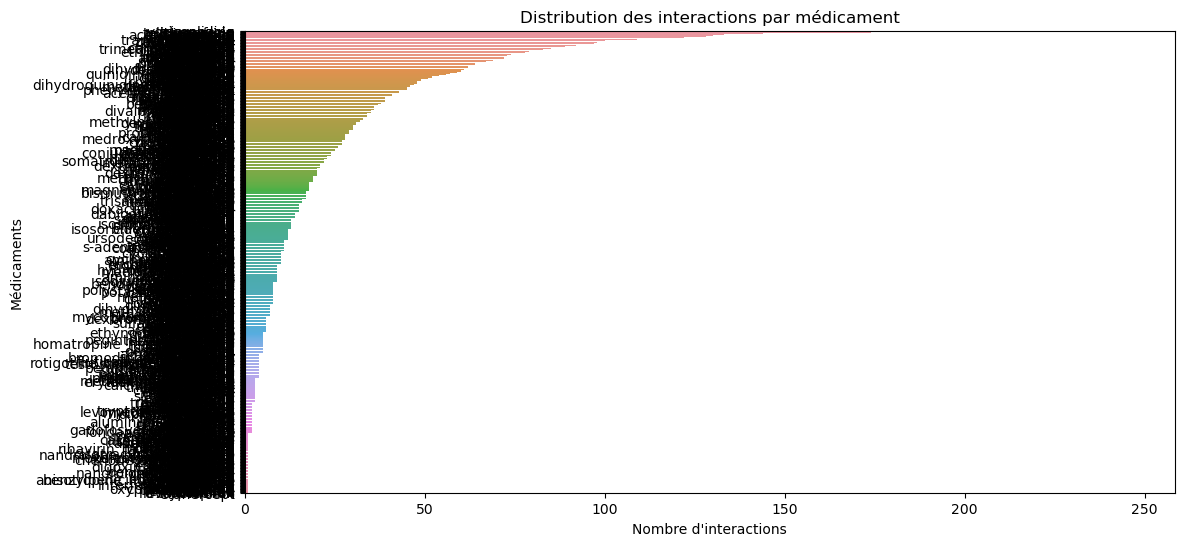

In [2]:
# Distribution des médicaments
plt.figure(figsize=(12, 6))
sns.countplot(y='drug1', data=df, order=df['drug1'].value_counts().index)
plt.title('Distribution des interactions par médicament')
plt.xlabel('Nombre d\'interactions')
plt.ylabel('Médicaments')
plt.show()

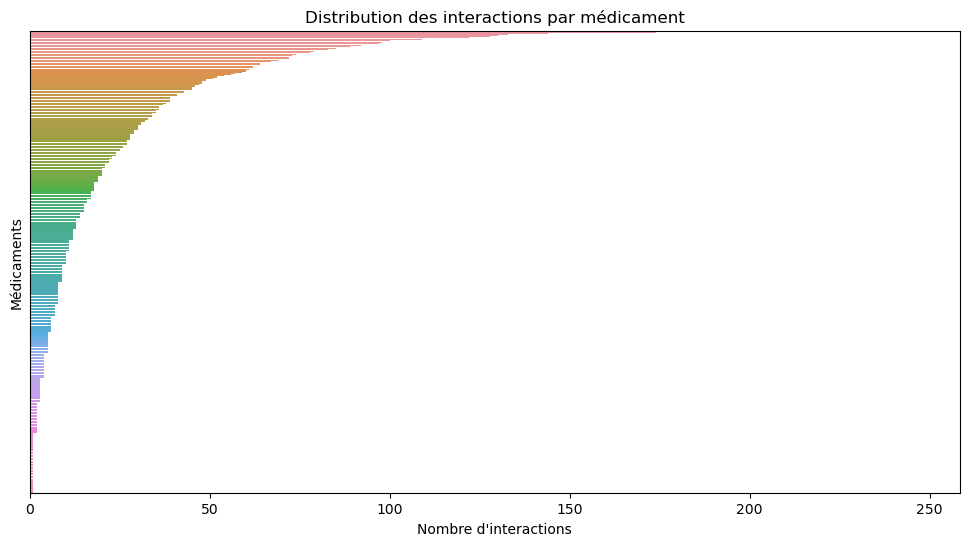

In [3]:
# Distribution des médicaments sans étiquettes sur l'axe y
plt.figure(figsize=(12, 6))
sns.countplot(y='drug1', data=df, order=df['drug1'].value_counts().index)
plt.title('Distribution des interactions par médicament')
plt.xlabel('Nombre d\'interactions')
plt.ylabel('Médicaments')

# Masquer les étiquettes de l'axe y
plt.yticks([])

plt.show()


### b) Distribution of the top 20 medications with the most interactions

Due to the overlap of data when creating a graph with all medications, we have decided to focus on a graph featuring only the top 20 medications with the most interactions. This approach allows us to clearly see that Voriconazole has the highest number of interactions, totaling 246, and is primarily used as an antifungal medication. Meanwhile, the 20th medication on the list, Tranylcypromine, has 112 interactions and is used as an antidepressant in the treatment of major depressive disorder.

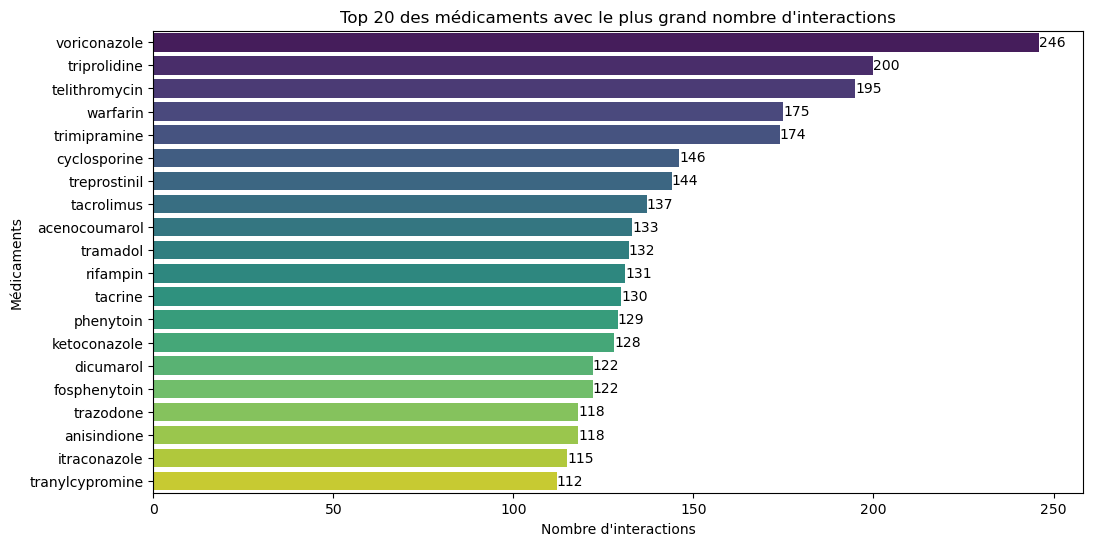

In [4]:
# Calculer le nombre d'interactions par médicament
drug_counts = df['drug1'].value_counts()

# Sélectionner les top 20 médicaments avec le plus d'interactions
top_drugs = drug_counts.head(20)

# Créer un graphique pour les top 20 médicaments
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette="viridis")
plt.title('Top 20 des médicaments avec le plus grand nombre d\'interactions')
plt.xlabel('Nombre d\'interactions')
plt.ylabel('Médicaments')
# Ajouter le nombre d'interactions sur les barres
for index, value in enumerate(top_drugs.values):
    plt.text(value, index, str(value), color='black', ha="left", va="center")
plt.show()

### c) Distribution of the top 20 medications with the less interactions

We also created a graph featuring the top 20 medications with the fewest interactions. Each of these 20 medications has only one interaction. Notably, this list includes urea, which is used primarily for hydration and to treat dry or rough skin conditions. Another medication, D-tryptophan, serves as a precursor in the synthesis of serotonin, a neurotransmitter important for mood regulation. Lastly, quinacrine is utilized for its antiparasitic properties, particularly in treating malaria and certain autoimmune diseases.

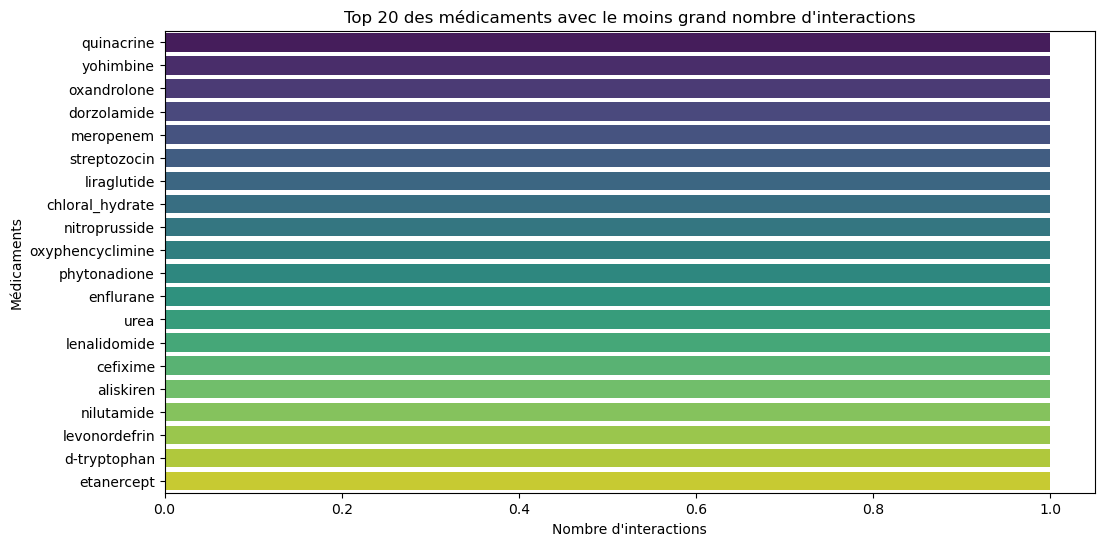

In [5]:
# Calculer le nombre d'interactions par médicament
drug_counts = df['drug1'].value_counts()

# Sélectionner les 20 médicaments avec le moins d'interactions
bottom_drugs = drug_counts.tail(20)

# Créer un graphique pour les 20 médicaments avec le moins d'interactions
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_drugs.values, y=bottom_drugs.index, palette="viridis")
plt.title('Top 20 des médicaments avec le moins grand nombre d\'interactions')
plt.xlabel('Nombre d\'interactions')
plt.ylabel('Médicaments')
plt.show()

### d) Heatmap for top 20 medications with the most interactions

To conclude our analysis, a final graph was created that displays a heatmap showing the interactions among the top 20 medications with the most interactions. The medications are arranged alphabetically along each axis. A legend on the right side of the graph indicates that a yellow cell represents the presence of an interaction between medications, while a purple cell signifies no interaction. This heatmap offers a concise and informative view of the interaction patterns among these medications.

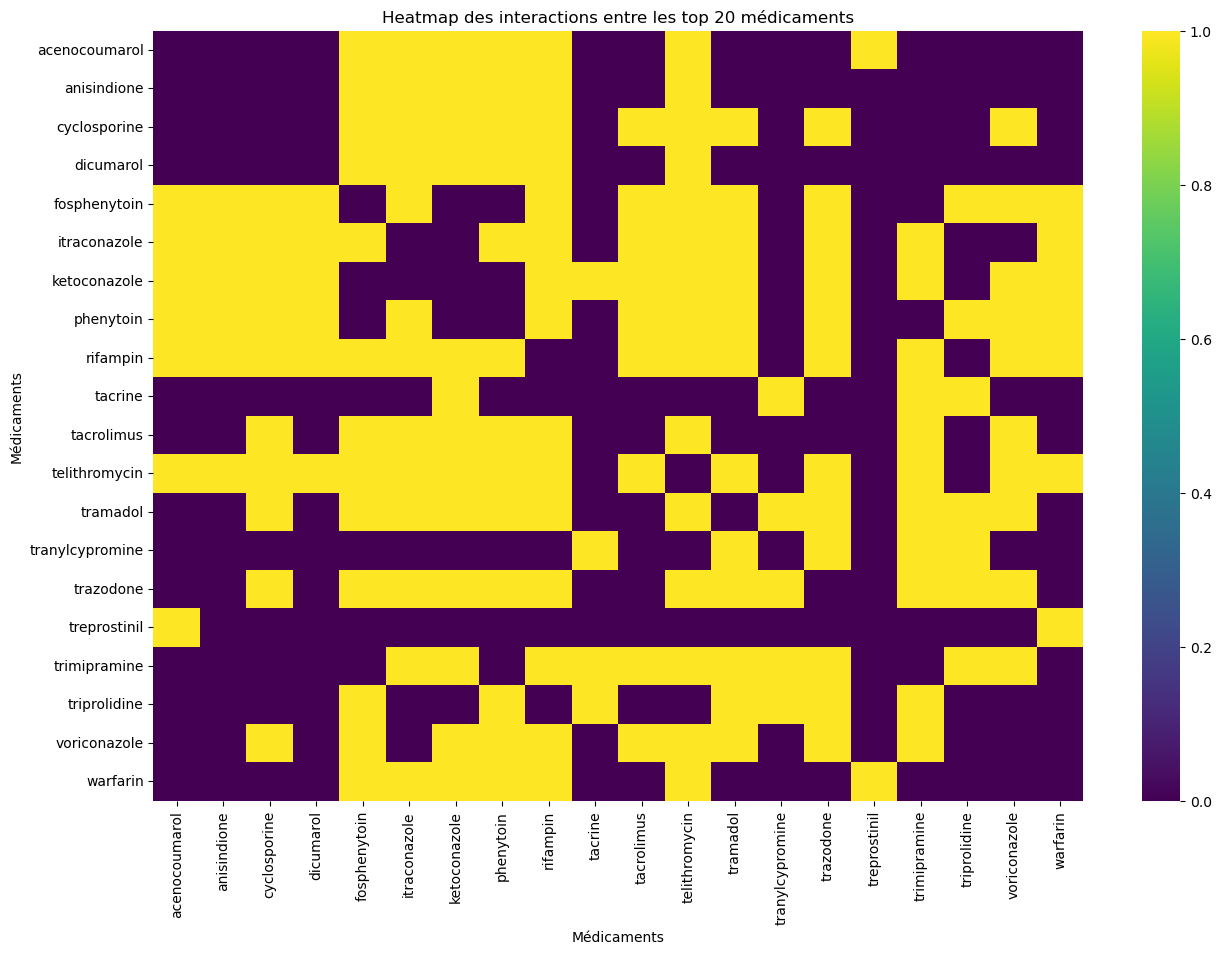

In [6]:
# Sélectionner les interactions pour les top 20 médicaments
top_interactions = df[(df['drug1'].isin(top_drugs.index)) & (df['drug2'].isin(top_drugs.index))]

# Créer une matrice d'interaction pour les top 20 médicaments
interaction_matrix = pd.crosstab(top_interactions['drug1'], top_interactions['drug2'])

# Créer une heatmap pour les top 20 médicaments
plt.figure(figsize=(15, 10))
sns.heatmap(interaction_matrix, annot=False, cmap='viridis')
plt.title('Heatmap des interactions entre les top 20 médicaments')
plt.xlabel('Médicaments')
plt.ylabel('Médicaments')
plt.show()


## 4) Project Features Overview
### a) Data loading and Function integration

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Chargement des données avec le délimiteur correct
data_path = '../data/drug_interactions.csv'
df = pd.read_csv(data_path, delimiter=';')

# Vérifier les colonnes du DataFrame
print(df.columns)

Index(['drug1', 'drug2'], dtype='object')


In [8]:
# Fonction pour vérifier les interactions entre deux médicaments
def check_interaction(df, drug1, drug2):
    interactions = df[(df['drug1'] == drug1) & (df['drug2'] == drug2) | (df['drug1'] == drug2) & (df['drug2'] == drug1)]
    if not interactions.empty:
        return "Do not associate these two drugs together."
    else:
        return "No interaction. Warning: The absence of drug interactions does not guarantee safety. Always consult a healthcare professional."

# Fonction pour lister les interactions pour un médicament spécifique
def list_interactions(df, drug):
    associated_drugs = pd.concat([
        df[df['drug1'] == drug]['drug2'],
        df[df['drug2'] == drug]['drug1']
    ]).unique()
    associated_drugs.sort()
    return associated_drugs

### b) Development of the Interaction Control Interface

This section of the notebook is dedicated to developing user interfaces for analyzing drug interactions. The following code implements two main features: the first allows users to verify if an interaction exists between two specific drugs, and the second lists all known interactions for a given drug. These features are implemented using interactive widgets that facilitate the entry of drug names and the display of results directly within the notebook. Here is an overview of the implemented code:

- **Widgets for drug entry**: Text fields allow users to enter the names of the two drugs for which they want to check the interaction.
- **Verification button**: A button, once clicked, triggers the function to verify interactions between the entered drugs.
- **Display of interactions**: Results are displayed directly under the widgets after verification, indicating either the absence of an interaction or detailing the nature of the interaction.

This interactive approach ensures intuitive and efficient use of the notebook for quick and accurate analyses of drug interactions.

In [9]:
drug1_widget = widgets.Text(description="Drug 1:")
drug2_widget = widgets.Text(description="Drug 2:")
check_button = widgets.Button(description="Check Interaction")

def on_check_button_clicked(b):
    drug1 = drug1_widget.value
    drug2 = drug2_widget.value
    result = check_interaction(df, drug1, drug2)
    print(result)

check_button.on_click(on_check_button_clicked)
display(drug1_widget, drug2_widget, check_button)

drug_widget = widgets.Text(description="Drug:")
list_button = widgets.Button(description="List Interactions")

def on_list_button_clicked(b):
    drug = drug_widget.value
    result = list_interactions(df, drug)
    print(f"{drug} should not be associated with the following drugs:")
    for d in result:
        print(d)

list_button.on_click(on_list_button_clicked)
display(drug_widget, list_button)

Text(value='', description='Drug 1:')

Text(value='', description='Drug 2:')

Button(description='Check Interaction', style=ButtonStyle())

Text(value='', description='Drug:')

Button(description='List Interactions', style=ButtonStyle())

## 5) Results
After executing the functions above, here are the results of the interaction checks and the lists of specific interactions.

### a) Interaction check
- Exemple: Interaction between `Aspirin` and `Ibuprofen`.
  - Résultat: "No interaction. Warning: The absence of drug interactions does not guarantee safety. Always consult a healthcare professional."
  
- Exemple: Interaction between `Warfarin` and `Phenytoin`.
  - Résultat: "Do not associate these two drugs together."
  

### b) List of Specific Drug Interactions
- Exemple: Interactions pour `Acetophenazin`.
  - Résultat: `Acetophenazin` should not be associated with the following drugs:
    - `bromocriptin`
    - `cisapride`
    - `diethylpropio`
    - `fenfluramin`
    - `guanethidine`
    - `mazindol`
    - `phentermine`
    - `phenylpropanolamine`
    - `tacrine`
    - `terfenadine`
    - `tetrabenazine`
    - `trimethobenzamide`
    - `triprolidine`
    - `trospium`

## 6) Limitations
- The drug interaction database may not be exhaustive
- The absence of a detected interaction does not guarantee safety; it is always recommended to consult a healthcare professional.
- Drug names must be entered exactly as they appear in the database, which can lead to errors if names are misspelled.
- The analysis may not account for all patient-specific factors such as age, weight, underlying health conditions, and concurrent use of other medications or supplements.
- The system does not evaluate the severity of interactions, only the presence or absence of them.
- The tool does not provide dosage-specific interactions; the interactions listed are generalized and may vary with different dosages.
- The tool does not account for interactions with foods, dietary supplements, or other non-pharmaceutical substances, which can also impact drug efficacy and safety.

## 7) Potential Areas for Improvement
- Add an auto-correction feature for drug names to reduce input errors.
- Regularly update the drug interaction database to include the latest research findings.
- Incorporate patient-specific factors such as age, weight, and underlying health conditions to provide more personalized interaction analyses.
- Implement a severity rating system for drug interactions to help prioritize risks.
- Include a feature to provide dosage-specific interaction information.
- Offer educational resources or links to scientific literature for users to better understand the interactions.
- Enable multilingual support to cater to a broader user base.

## 8) Challenges

- **Data Acquisition:** One of the main challenges was finding the data. Initially, we requested access to the most recent data from DrugBank, but due to the long waiting time, we abandoned this idea. Instead, we created our own database with 155 medications, which was limited and it took about 5 hours to manually enter each medication line by line. We were still not satisfied with our database, so we conducted further research and obtained access to an older database from DrugBank dating back to 2012. We are aware that this database is likely incomplete, but it contains over 20,000 medications and includes most of the known interactions. 


- **Data:** When we created the code, we encountered many errors originating from the data we retrieved. Some lines were misplaced within the 20,000 lines of the document, which took us a significant amount of time to identify the problematic lines and understand why the code was not working. Additionally, after completing the code, we noticed that when the interaction list appeared for a specific medication, many drugs were listed twice. This skewed our data, showing double the interactions and resulting in incorrect counts. We had to add some lines of code to remove the duplicate entries.


- **Data visualisation:** We also encountered many problems when creating the graphs to visualize the data. First, we searched for the best method to visualize the interactions between the medications. Then, several issues arose during code execution, including overlapping graphs and the separation of each medication.


- **Computer:** Finally, we sent you an email explaining that we encountered a problem with one of our computers. It had broken down, preventing us from accessing it. Fortunately, I was able to recover it the following day.



## 9) Conclusion
In summary, this project allows for the verification of interactions between different medications and lists the drugs that should not be combined. Although there are limitations, future improvements can enhance the accuracy and usability of the project. Thank you for following this notebook.! :) 
